<a href="https://colab.research.google.com/github/michael18781/ComputationalPhys/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2: Integration






## Preliminary code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Integrands for the second half of this exercise
def integrand_cos(x):
  return np.cos(np.pi*(x**2)/2)

def integrand_sin(x):
  return np.sin(np.pi*(x**2)/2)

# Core task 1

For this task we want to do monte-carlo integration for a given integrand and we will make this task non-vectorised so that in supplementary task 1 we can compare it to a vectorised version.





In [ ]:
s = np.pi/8
error_samples = 25

def our_function(sample):
    # Sample is an 8-dimensional array and we evaluate the sin function
    sum = 0.0
    for item in sample:
      sum += item
    return 10**6 * np.sin(sum)

"""
  This is the NON-VECTORISED VERSION.

  1) prediction(num_samples) returns an estimate of the integral for a 
  given N samples. Also gives the mean value of f and mean square value of f 
  which is the mean value of the integrand and the mean value of the integrand 
  squared respectively

  2) average_and_stdDev_of_predictions(num_samples) returns the mean and
  standard deviation from estimates produced several times.

  3) plotting_error(start, end, number) plots the standard deviation for a
  range of N and computes and plots the expected errors.
"""

def prediction(num_samples):
  # For a given N, calculate the integral estimate
  mean_f = 0.0 # The mean value of the function
  mean_f_squared = 0.0 # The mean value of the function squared

  for i in range (0, num_samples):
    arr = np.random.rand(8)*s # Generate a point in 8D space
    mean_f += our_function(arr)/num_samples
    mean_f_squared += (our_function(arr)**2)/num_samples
  
  return mean_f * (s**8), mean_f, mean_f_squared

def average_and_stdDev_of_predictions(num_samples):
  # For a given N, calculate the integral estimate multiple times and find the standard dev
  repeats = np.zeros((error_samples))

  for n in range(0, error_samples):
    repeats[n] = prediction(num_samples)[0]

  # Code the calculate the mean and standard deviation
  sum_of_repeats = 0.0
  sum_of_repeats_squared = 0.0

  for estimate in repeats:
    sum_of_repeats += estimate
  mean = sum_of_repeats/len(repeats)

  for estimate in repeats:
    sum_of_repeats_squared += (estimate - mean)**2
  standard_deviation = np.sqrt(sum_of_repeats_squared/len(repeats))

  return mean, standard_deviation

def plotting_error(start, end, number):
  # For a range of N, calculate the integral estimate multiple times and find the standard dev
  n = np.linspace(start, end, number)
  y = np.zeros((len(n)))
  z = np.zeros((len(n)))

  for (i, N) in enumerate(n):
    # Calculating standard deviations 
    y[i] = average_and_stdDev_of_predictions(int(N))[1]

    # Expected error comparison
    estimate, mean_f, mean_f_squared = prediction(int(N))
    # Calculating the expected error from the formula
    expected_error = (s**8) * np.sqrt(np.absolute((mean_f_squared - (mean_f)**2))/N)
    z[i] = expected_error

  # Plotting results to check that we see an improvement in accuracy with N
  plt.plot(n, y, label='Actual error')
  plt.plot(n, z, label='Expected error')

  plt.ylabel('Standard deviation')
  plt.xlabel('Number of samples, N')

  plt.legend()
  plt.show()

%timeit print(average_and_stdDev_of_predictions(200000)) # This makes a prediction for N = 200,000
plotting_error(10, 1000, 10) # Shows the error for various values of N vs what the formula would give

## Conclusions for core task 1

Largest value of N tested to compute in about 1 minute:

1.   N = 200,000
2. T = 1min 6s
3. Integral = 537.19 +- 0.08
4. About 0.016% accuracy

Have managed to produce an integral estimate using the Monte Carlo integration method. The plot below shows the actual error vs expected error and it usually agrees quite well. However we have seen that the actual error tends to diverge from the expected error at low N values.

![](https://drive.google.com/uc?export=view&id=1RBMFnZLkeu4RJEWJQakw93cS78e_3pwB)


# Supplementary task 1

This version of the code was written to attempt to speed up the original code from core task 1. 


In [ ]:
s = np.pi/8
error_samples = 25

def our_function(sample):
    # Sample is a matrix and we evaluate the sin function after summing each row
    return 10**6 * np.sin(np.sum(sample, axis=1))

""" 
  This is the VECTORISED VERSION.
  
  1) prediction(num_samples) returns an estimate of the integral for a 
  given N samples. Also gives the mean value of f and mean square value of f 
  which is the mean value of the integrand and the mean value of the integrand 
  squared respectively

  2) average_and_stdDev_of_predictions(num_samples) returns the mean and
  standard deviation from estimates produced several times.

  3) plotting_error(start, end, number) plots the standard deviation for a
  range of N and computes and plots the expected errors.
"""

def prediction(num_samples):
  # For a given N, calculate the integral estimate
  mean_f = 0.0
  mean_f_squared = 0.0

  # We generate a matrix of random numbers. Each row represents a specific sample.
  # Hence to find the mean value of the function we evaluate the function on each row
  # to give an array of length num_samples and then take the average over this
  samples_array = np.random.rand(num_samples, 8)*s
  mean_f = np.mean(our_function(samples_array))
  mean_f_squared = np.mean(our_function(samples_array)**2)
  
  return mean_f * (s**8), mean_f, mean_f_squared

def average_and_stdDev_of_predictions(num_samples):
  # For a given N, calculate the integral estimate multiple times and find the standard dev
  repeats = np.zeros((error_samples))

  for n in range(0, error_samples):
    repeats[n] = prediction(num_samples)[0]

  # Code to calculate mean and standard deviation
  mean = np.mean(repeats)
  standard_deviation = np.std(repeats)

  return mean, standard_deviation

def plotting_error(start, end, number):
  # For a range of N, calculate the integral estimate multiple times and find the standard dev
  n = np.linspace(start, end, number)
  y = np.zeros((len(n)))
  z = np.zeros((len(n)))

  for (i, N) in enumerate(n):
    # Calculating standard deviations 
    y[i] = average_and_stdDev_of_predictions(int(N))[1]

    # Expected error comparison
    estimate, mean_f, mean_f_squared = prediction(int(N))
    # Calculating the expected error from the formula
    expected_error = (s**8) * np.sqrt(np.absolute((mean_f_squared - (mean_f)**2))/N)
    z[i] = expected_error

  # Plotting results to check that we see an improvement in accuracy with N
  plt.plot(n, y, label='Actual error')
  plt.plot(n, z, label='Expected error')

  plt.ylabel('Standard deviation')
  plt.xlabel('Number of samples, N')

  plt.legend()
  plt.show()

%timeit average_and_stdDev_of_predictions(200000)
plotting_error(10, 1000, 10)

## Conclusions for supplementary task 1

This is far faster and we can see the comparison below:

1.   N = 200,000
2. T = 944ms
3. Integral = 537.19 +- 0.08
4. About 0.016% accuracy


# Core task 2: 

This task is to estimate the Fresnel integrals using a scipy quadrature method. We will then plot the classic spiral.

In [ ]:
"""
Code to use the scipy quad function which integrates by a quadrature method. 
Produces a set of the evaluated Fresnel integrals for a range of u values and 
then plots them to see the Fresnel spiral.
"""

# Creating a set of u values (the limits on the integrals)
u  = np.arange(-10, 10, 0.01, dtype=float)

# Creating our numpy array of 'x' and 'y' values
pointsC = np.zeros(shape=(len(u)))
pointsS = np.zeros(shape=(len(u)))

# Computing integrals for each value of u
for (i, U) in enumerate(u):
  pointsC[i] = quad(integrand_cos, 0, U)[0]
  pointsS[i] = quad(integrand_sin, 0, U)[0]

# Plotting the spiral using matplotlib
plt.plot(pointsC, pointsS)
plt.xlabel('C integral')
plt.ylabel('S integral')
plt.show()

## Conclusions for core task 2

We have managed to produce the Fresnel integrals using the scipy integrator "quad" which is a quadrature technique. They have been plotted as the usual spiral. It tends to 0.5+i0.5 at large u (moving along the curve) as expected.

![](https://drive.google.com/uc?export=view&id=1q0FmHDn40UPm_NK7ciAWSDP1VyEGdhnT)

# Supplementary task 2

In this task we try to plot the diffraction pattern using the Fresnel integrals. 

The on axis wave amplitude will be proportional to the integral of the Fresnel integrals. The location on the screen determines the limits on the integrals. We align the centre of the slit on Y = 0 such that the position on axis has limits w1 = -(d/2)*sqrt(2/lambda*D) to w2 = (d/2)*sqrt(2/lambda*D). A position Y on the screen has limits w1 = (Y-d/2)*sqrt(2/lambda*D) to w2 = (Y+d/2)*sqrt(2/lambda*D). 

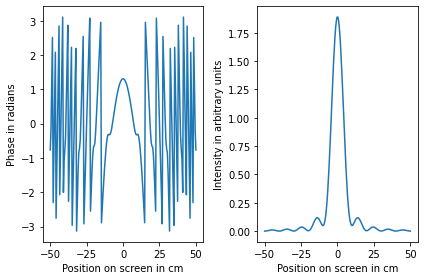

In [ ]:
""" 
Code to calculate the Fresnel integrals for a range of positions on a screen.
Appropriate scaling was done to ensure the integral limits were correct.
This allows us to calculate the intensity of the diffraction pattern and plot it.
The distance to the screen D, wavelength L, and slit width d can be varied below.
"""

D = 100.0
L = 1.0
d = 10.0

# Set up positions on the screen, all measurements in cm
y = np.linspace(-50, 50, 200)
intensity = np.zeros(shape=(len(y)))
phase = np.zeros(shape=(len(y)))

for (i, Y) in enumerate(y):
  # Limits for fresnel integrals
  w1 = (Y-d/2)*(np.sqrt(2/(L*D)))
  w2 = (Y+d/2)*(np.sqrt(2/(L*D)))

  int_sin = quad(integrand_sin, w1, w2)[0]
  int_cos = quad(integrand_cos, w1, w2)[0]

  intensity[i] = (int_sin)**2 + (int_cos)**2
  phase[i] = np.arctan2(int_cos, int_sin)

# Plotting intensity
plt.subplot(1, 2, 2)
plt.plot(y, intensity)
plt.xlabel('Position on screen in cm')
plt.ylabel('Intensity in arbitrary units')

# Plotting phase
plt.subplot(1, 2, 1)
plt.plot(y, phase)
plt.xlabel('Position on screen in cm')
plt.ylabel('Phase in radians')

plt.tight_layout()
plt.show()

## Conclusions for supplementary task 2

We see what we expect from studies of the Fresnel diffraction patterns. The relative phase seems to make sense too.

These plots show the intensity and phase for D = 30, 50, and 100cm (in that order)

![](https://drive.google.com/uc?export=view&id=13uqNrfzk4TBOpELuizNTnmQLYn2ZYQdJ)

![](https://drive.google.com/uc?export=view&id=1bo9hJJk_7gfc6_HnsOmy4aYVNfU5zPY7)

![](https://drive.google.com/uc?export=view&id=1Y85NLbrhyoBO3biylOcDMtHmh_p4LK4z)

We can see in the last plot we have emerged towards the Fraunhofer limit.